## Midterm Exam Solutions - Questions 6 - 25

In [1]:
import pandas as pd
df = pd.read_csv("Midterm_20231012f.csv")
df

,product,country,date,sales,expenses
0,d,Germany,2020-01-31,919.387861,690.821430
1,j,japan,2020-10-27,923.908909,731.135011
2,c,Canada,2020-02-02,936.079916,697.273355
3,c,Germany,2020-10-20,921.434384,664.835960
4,g,Canada,2020-11-22,947.494772,728.473220
...,...,...,...,...,...
10682,i,Germany,2020-06-02,923.301366,723.241429
10683,d,Canada,2020-05-09,913.015379,749.446776
10684,f,Canada,2020-09-18,908.875748,702.361053
10685,f,Germany,2020-07-25,931.785320,719.262556


In [2]:
#Question 6 - How many rows in the dataset - 10687
#Question 7 - How many variables in the dataset - 5
df.shape

(10687, 5)

In [3]:
#Question 8 - Data type for date variable - object
df.dtypes

product      object
country      object
date         object
sales       float64
expenses    float64
dtype: object

In [4]:
#Question 9 - Missing values for sales - 92
df.isna().sum()

product      0
country      0
date         0
sales       92
expenses     0
dtype: int64

In [5]:
#Question 10 - sum of all the expenses - 7660576.38
df["expenses"].sum().round(2)

7660576.38

In [6]:
#Question 11 - which product has the most records - g
df["product"].value_counts()

product
g    1096
c    1095
f    1086
j    1066
b    1065
d    1064
i    1064
a    1062
h    1050
e    1039
Name: count, dtype: int64

In [7]:
#Question 12 - which country has most records for product a - japan
df.query("product == 'a'")["country"].value_counts()

country
japan      282
Germany    264
Canada     260
US         256
Name: count, dtype: int64

In [8]:
#Question 13 - which product has most records for japan - b
df.query("country == 'japan'")["product"].value_counts()

product
b    284
a    282
f    273
j    271
c    270
i    269
h    267
d    266
g    263
e    244
Name: count, dtype: int64

In [9]:
#Question 14 - how many records from US for product j - 266
df.query("country == 'US' & product == 'j'").count()

product     266
country     266
date        266
sales       263
expenses    266
dtype: int64

In [10]:
#Question 15 - out of all records, what % from Germany for product f - 0.025
pd.crosstab(df["country"], df["product"], normalize = "all").round(3)

product,a,b,c,d,e,f,g,h,i,j
country,,,,,,,,,,
Canada,0.024,0.025,0.025,0.024,0.025,0.025,0.027,0.025,0.026,0.025
Germany,0.025,0.024,0.025,0.025,0.024,0.025,0.027,0.023,0.024,0.024
US,0.024,0.024,0.027,0.026,0.026,0.026,0.025,0.025,0.025,0.025
japan,0.026,0.027,0.025,0.025,0.023,0.026,0.025,0.025,0.025,0.025


In [11]:
#Question 16 - sum of the expenses for product f from either US or japan - 395542.1
df.query("(country == 'US' | country == 'japan') & product == 'f'")["expenses"].sum().round(1)

395542.1

In [12]:
#Question 17 - average sales for rows with expenses > 700 - 923.3
df.query("expenses > 700")["sales"].mean().round(1)

923.3

In [13]:
#Question 18 - standard deviation for sales of product d - 16.9
df.query("product == 'd'")["sales"].describe().round(1)

count    1048.0
mean      923.0
std        16.9
min       873.0
25%       911.7
50%       923.1
75%       934.0
max       977.3
Name: sales, dtype: float64

<Axes: xlabel='sales', ylabel='expenses'>

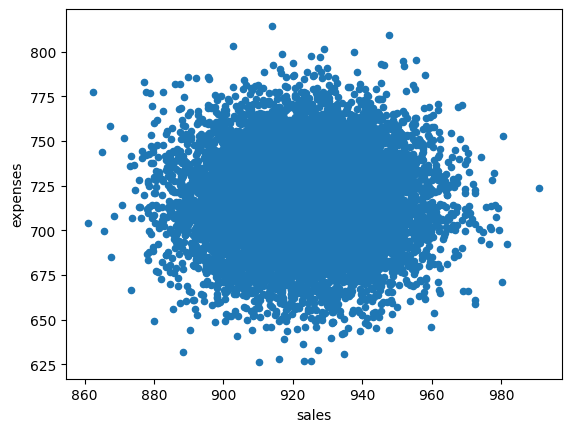

In [14]:
#Question 19 - scatterplot of sales vs. expenses
df.plot.scatter(x = "sales", y = "expenses")

<Axes: ylabel='Frequency'>

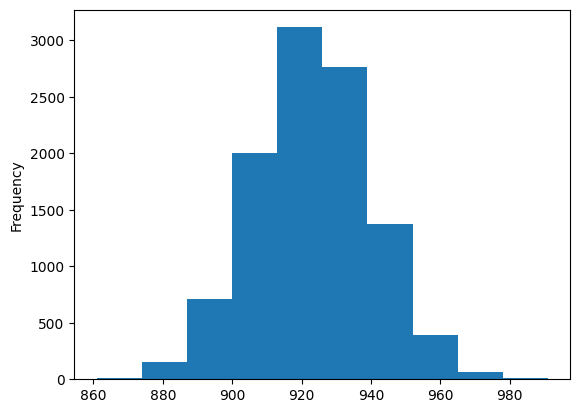

In [15]:
#Question 20 - histogram of sales
df["sales"].plot.hist()

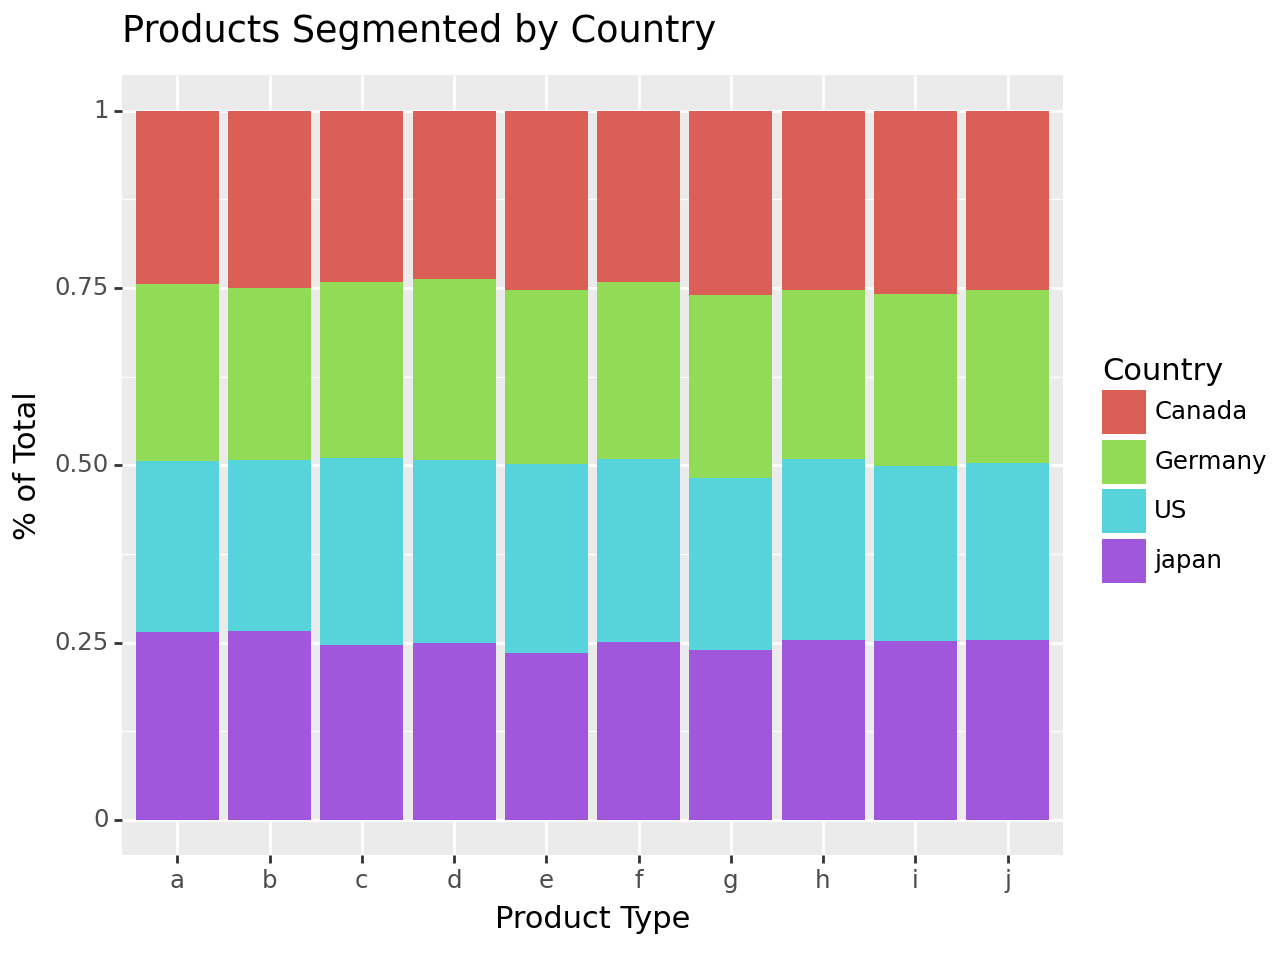

<Figure Size: (640 x 480)>

In [16]:
#Question 21 - recreate ggplot
from plotnine import *
p = (ggplot(df) + aes(x = "product", fill = "country") + 
 geom_bar(position = "fill") +
 labs(x = "Product Type", y = "% of Total", fill = "Country", 
     title = "Products Segmented by Country"))
p

In [17]:
ggsave(p, filename = "MidtermQ21.png")

/opt/tljh/user/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6.4 x 4.8 in image.
/opt/tljh/user/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: MidtermQ21.png


In [18]:
#Question 22 - replace expenses = log(expenses) + 5 ...what is mean - 11.57
import numpy as np
df["expenses"] = np.log(df["expenses"]) + 5
df["expenses"].describe().round(2)

count    10687.00
mean        11.57
std          0.04
min         11.44
25%         11.55
50%         11.57
75%         11.60
max         11.70
Name: expenses, dtype: float64

In [19]:
#Question 23 - assign NaN to product if sales < 900 ...how many rows for product c - 1017
df.loc[df["sales"]<900, "product"] = np.NaN
df["product"].value_counts()

product
c    1017
g    1005
f    1001
b     990
j     986
d     973
i     966
e     965
a     958
h     952
Name: count, dtype: int64

In [20]:
#Question 24 - create sales2 as square of sales ...what is mean of sales2 - 852715.89
df["sales2"] = df["sales"]**2
df["sales2"].describe().round(2)

count     10595.00
mean     852715.89
std       31005.72
min      741362.28
25%      831539.83
50%      852402.49
75%      873255.67
max      982085.51
Name: sales2, dtype: float64

In [21]:
#Question 25 - replace sales with sales*2 if country is Canada or Germany ...mean of sales - 1382.2
df.loc[(df["country"] == "Canada") | (df["country"] == "Germany"), "sales"] = df["sales"]*2
df["sales"].describe().round(1)

count    10595.0
mean      1382.2
std        462.2
min        861.0
25%        923.5
50%        967.4
75%       1845.8
max       1961.5
Name: sales, dtype: float64